In [ ]:
import pandas as pd
import numpy as np
import os
import glob

In [ ]:
# To view full dataframes
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth',None)

# To view shortned df
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 20)
pd.set_option('display.max_colwidth',20)


In [ ]:
analyses_dir = '/Users/kwegner-clemens/Google Drive/*research/semanticDistance/analyses/'
data_dir = '/Users/kwegner-clemens/Google Drive/*research/semanticDistance/data/'

filenames=glob.glob('/Users/kwegner-clemens/Google Drive/*research/semanticDistance/data/av data/*.csv')

In [ ]:
# Load data
li = []

for f in filenames:
    file = pd.read_csv(f, index_col=None, header=0)
    li.append(file)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.sort_values(by='seqnum')

In [ ]:
# Clean up data frame
dfFull = df;
data = df.drop(columns=['experimentName', 'versionName', 'windowWidth', 'windowHeight', 'screenWidth', 'screenHeight', 'startDate', 'startTime']);

In [ ]:
match1 = data[data["trialPrompt"] == data["trialOpt1"]]
match2 = data[data["trialPrompt"] == data["trialOpt2"]]

match1.loc[(match1['keyPress'] == 'left'), 'acc'] = 1 # prompt = opt1 so left is correct
match1.loc[(match1['keyPress'] == 'right'), 'acc'] = 0 

match2.loc[(match2['keyPress'] == 'left'), 'acc'] = 0 # prompt = opt2 so left is wrong
match2.loc[(match2['keyPress'] == 'right'), 'acc'] = 1

/Users/kwegner-clemens/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kwegner-clemens/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
matchdf = pd.concat([match1, match2])
matchdf

,subjID,seqnum,trialNum,trialType,trialPrompt,trialOpt1,trialOpt2,keyPress,RT,experimentTime,totalTime,acc
36802,368636,0,168,a,a10,a10,a6,left,3159,NaN,1489883,1.0
36853,368636,0,219,a,i2,i2,i3,left,2966,NaN,1489883,1.0
36913,368636,0,279,v,h10,h10,h8,left,7303,NaN,1489883,1.0
36739,368636,0,105,v,a6,a6,a9,left,6120,NaN,1489883,1.0
49705,226115,1,13,a,a6,a6,a9,left,2270,NaN,1229598,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31270,679689,156,27,v,a5,a10,a5,right,3893,NaN,1331446,1.0
31274,679689,156,31,v,a7,a10,a7,right,3894,NaN,1331446,1.0
31399,679689,156,156,a,a8,a3,a8,right,2352,NaN,1331446,1.0
31520,679689,156,277,v,h5,h3,h5,right,3056,NaN,1331446,1.0


In [ ]:
ids = np.unique(matchdf['subjID'])
len(ids)

159

In [ ]:
overallAcc = matchdf['acc'].mean()

accBySub = []

subs = np.unique(matchdf['seqnum'])


for i in subs:
    curr = matchdf[matchdf['seqnum'] == i]
    accBySub.append([i, curr['acc'].mean()])
    #print(curr)
    
accBySub

[[0, 0.8],
 [1, 1.0],
 [2, 0.7142857142857143],
 [3, 0.8],
 [4, 0.7777777777777778],
 [5, 1.0],
 [6, 0.8],
 [7, 0.9583333333333334],
 [8, 0.9],
 [9, 0.8333333333333334],
 [10, 1.0],
 [11, 1.0],
 [12, 1.0],
 [13, 1.0],
 [14, 0.8],
 [15, 0.6666666666666666],
 [16, 0.8888888888888888],
 [18, 0.9444444444444444],
 [19, 1.0],
 [20, 1.0],
 [21, 0.9166666666666666],
 [22, 0.8],
 [23, 0.7142857142857143],
 [24, 0.8],
 [26, 0.8571428571428571],
 [27, 0.6666666666666666],
 [28, 1.0],
 [30, 1.0],
 [32, 1.0],
 [34, 1.0],
 [36, 0.8],
 [38, 1.0],
 [40, 1.0],
 [41, 1.0],
 [42, 1.0],
 [43, 0.7777777777777778],
 [44, 1.0],
 [45, 1.0],
 [46, 1.0],
 [47, 1.0],
 [48, 1.0],
 [49, 0.7777777777777778],
 [50, 1.0],
 [51, 0.8],
 [52, 0.8],
 [53, 1.0],
 [54, 1.0],
 [55, 1.0],
 [56, 1.0],
 [57, 0.8888888888888888],
 [58, 1.0],
 [59, 0.7],
 [60, 0.7],
 [61, 0.6428571428571429],
 [62, 1.0],
 [63, 1.0],
 [64, 1.0],
 [65, 0.8],
 [66, 1.0],
 [67, 0.7],
 [68, 0.7142857142857143],
 [69, 1.0],
 [70, 0.7222222222222222],

## Drop bad sequences

In [ ]:
badID = [719826,714632,645273,660200,728735,518624,799672,8072963,249156,870028,
           892904,125211,815617,668931,999946,332732,886315,422262,985933,713242, 733002,
        794194,485401,732270, 345143, 860155, 896207,580905,496885,276043,761168]

for i in range(0,len(badID)):
    
    if i==0:
        gdata = data[data.subjID != badID[i]]
        gmatch = matchdf[matchdf.subjID != badID[i]]
    else:
        gdata = gdata[gdata.subjID != badID[i]]
        gmatch = gmatch[gmatch.subjID != badID[i]]

In [ ]:
# Recalculate accuracy with bad sequences removed
goodAccBySub = []
goodAcc = []
codes = np.unique(gmatch['subjID'])

for i in codes:
    curr = gmatch[gmatch['subjID'] == i]
    goodAccBySub.append([curr['seqnum'].mean(), round(curr['acc'].mean(),1), i])
    goodAcc.append(curr['acc'].mean())
    
print(" n= ", len(goodAcc), " acc ", np.mean(goodAcc))

accdf = pd.DataFrame(goodAccBySub)

 n=  140  acc  0.927154195011338


In [ ]:
accdf.sort_values(by=0)

min(accdf[1])


0.7

In [ ]:
# Figure out which seqs are still missing

allseqs = list(range(1,156))
excl = [7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
seqsIhave = np.unique(gdata.seqnum)

In [ ]:
missing = np.setdiff1d(allseqs,seqsIhave)
stillNeed = np.setdiff1d(missing, excl)

In [ ]:
stillNeed

array([], dtype=int64)

In [ ]:
len(stillNeed)

0

# Save full data set

In [ ]:
gdata_save = gdata.drop(['RT', 'experimentTime', 'totalTime'],axis=1)
gdata_save

,subjID,seqnum,trialNum,trialType,trialPrompt,trialOpt1,trialOpt2,keyPress
36634,368636,0,0,v,i7,i1,i6,right
36950,368636,0,316,v,i3,i4,i7,left
36951,368636,0,317,a,a9,a10,a3,left
36848,368636,0,214,a,a1,a6,a8,left
36847,368636,0,213,v,h7,h4,h6,left
...,...,...,...,...,...,...,...,...
31455,679689,156,212,v,i2,i2,i3,right
31456,679689,156,213,v,i7,i1,i8,right
31457,679689,156,214,v,a8,a2,a9,left
31450,679689,156,207,v,i7,i10,i4,right


## Drop match trials from the data frame

In [ ]:
temp1 = gdata[gdata.trialPrompt != gdata.trialOpt1] # remove trials where prompt matches opt 1
temp2 = temp1[temp1.trialPrompt != temp1.trialOpt2] # remove trials where prompt matches opt 2

test = temp2[temp2.trialPrompt == temp2.trialOpt2]

# 
mismatch = temp2;

In [ ]:
# Save mismatch

## Convert keypresses to selections

In [ ]:
mismatch.loc[(mismatch['keyPress'] == 'left'), 'selected'] = mismatch['trialOpt1'] # prompt = opt1 so left is correct
mismatch.loc[(mismatch['keyPress'] == 'right'), 'selected'] = mismatch['trialOpt2'] # prompt = opt1 so left is correct

/Users/kwegner-clemens/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kwegner-clemens/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
mismatch

,subjID,seqnum,trialNum,trialType,trialPrompt,trialOpt1,trialOpt2,keyPress,RT,experimentTime,totalTime,selected
36634,368636,0,0,v,i7,i1,i6,right,5973,NaN,1489883,i6
36950,368636,0,316,v,i3,i4,i7,left,3855,NaN,1489883,i4
36951,368636,0,317,a,a9,a10,a3,left,4592,NaN,1489883,a10
36848,368636,0,214,a,a1,a6,a8,left,4390,NaN,1489883,a6
36847,368636,0,213,v,h7,h4,h6,left,0,NaN,1489883,h4
...,...,...,...,...,...,...,...,...,...,...,...,...
31454,679689,156,211,v,i2,i10,i5,right,4639,NaN,1331446,i5
31456,679689,156,213,v,i7,i1,i8,right,4572,NaN,1331446,i8
31457,679689,156,214,v,a8,a2,a9,left,3340,NaN,1331446,a2
31450,679689,156,207,v,i7,i10,i4,right,3184,NaN,1331446,i4


In [ ]:
# put in actual stim names
# animals
mismatch = mismatch.replace('a1','cat')
mismatch = mismatch.replace('a2','dog')
mismatch = mismatch.replace('a3','duck')
mismatch = mismatch.replace('a4','sheep')
mismatch = mismatch.replace('a5','frog')
mismatch = mismatch.replace('a6','cow')
mismatch = mismatch.replace('a7','pig')
mismatch = mismatch.replace('a8','horse')
mismatch = mismatch.replace('a9','songbird')
mismatch = mismatch.replace('a10','rooster')
# instruments
mismatch = mismatch.replace('i1','guitar')
mismatch = mismatch.replace('i2','piano')
mismatch = mismatch.replace('i3','drum')
mismatch = mismatch.replace('i4','bell')
mismatch = mismatch.replace('i5','harp')
mismatch = mismatch.replace('i6','flute')
mismatch = mismatch.replace('i7','trumpet')
mismatch = mismatch.replace('i8','xylophone')
mismatch = mismatch.replace('i9','violin')
mismatch = mismatch.replace('i10','tambourine')
# household
mismatch = mismatch.replace('h1','doorbell')
mismatch = mismatch.replace('h2','camera')
mismatch = mismatch.replace('h3','glass')
mismatch = mismatch.replace('h4','phone')
mismatch = mismatch.replace('h5','paper')
mismatch = mismatch.replace('h6','toilet')
mismatch = mismatch.replace('h7','whistle')
mismatch = mismatch.replace('h8','cuckoo clock')
mismatch = mismatch.replace('h9','basketball')
mismatch = mismatch.replace('h10','ping pong')

mismatch

NameError: name 'mismatch' is not defined

## Functions to calculate probabilites & make heat maps

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
def calcProbs(stimlist, trialmat, filename):
    outmat = []
    probSelect = []
    probList = [];
    promptList = []
    selectList = [];
    
    for prompt in stimlist: 
        promptTrials = trialmat[trialmat.trialPrompt==prompt];    
    
        for selection in stimlist: 
        
            selectionIsOpt1 = promptTrials[promptTrials.trialOpt1 == selection]
            selectionIsOpt2 = promptTrials[promptTrials.trialOpt2 == selection]
        
            optionTrials = pd.concat([selectionIsOpt1, selectionIsOpt2])
            selectedTrials = optionTrials[optionTrials.selected==selection];
                
            if optionTrials.shape[0] > 0:
                probSelect.append([prompt, selection, selectedTrials.shape[0]/optionTrials.shape[0]]);
                
    psDF = pd.DataFrame(probSelect)
    psDF.to_csv(data_dir + 'probDFs/' + filename)
    
    return probSelect

In [ ]:
def makeHeatMap(probSelect, stimList, color):
    prompts = [];
    select = []
    prob = []
    
    probdf = pd.DataFrame(np.nan, index=stimList, columns=stimList)
    
    for i in range(0,len(probSelect)):
        prompts.append(probSelect[i][0]);
        select.append(probSelect[i][1]);
        prob.append(probSelect[i][2]);
                
    probdict = {'prompt': prompts, 'select': select,'prob': prob} 
    
    df2 = pd.DataFrame.from_dict(probdict)
    mat = df2.pivot(index='prompt', columns='select', values = 'prob')
    
    sn.heatmap(mat, annot=True, cmap=color, vmin=0, vmax=1)

# Overall heat maps

In [ ]:
# Shrink mismatch matrix 
mmSmall = mismatch.drop(columns = ["subjID", "trialNum", "keyPress", "RT", "experimentTime", "totalTime"])
mmSmall.dropna(inplace=True)

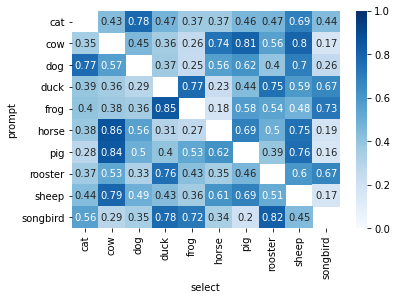

In [ ]:
animalList = ['cat','cow','dog','duck','frog','horse','pig','rooster', 'sheep', 'songbird']
animalProbs = calcProbs(animalList, mmSmall, 'animalProbs.csv')
makeHeatMap(animalProbs, animalList, 'Blues')

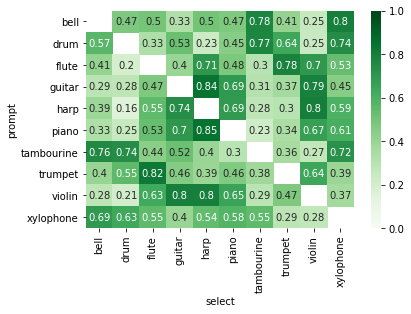

In [ ]:
instrList = ['bell', 'drum','flute','guitar','harp','piano','tambourine','trumpet','violin','xylophone']
instrProbs = calcProbs(instrList, mmSmall, 'instrProbs.csv')
makeHeatMap(instrProbs, instrList, 'Greens')

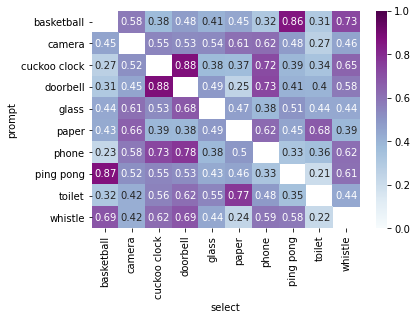

In [ ]:
hhList = ['basketball', 'camera', 'cuckoo clock','doorbell','glass','paper','phone','ping pong','toilet','whistle']
hhProbs = calcProbs(hhList, mmSmall, 'hhProbs.csv')
makeHeatMap(hhProbs, hhList, 'BuPu')

# Redo analysis with just auditory trials

In [ ]:
# Create auditory mismatch mat
dfAud = mismatch[mismatch.trialType != 'v']

# Shrink aud mismatch matrix 
dfAudSm = dfAud.drop(columns = ["subjID", "trialNum", "keyPress", "RT", "experimentTime", "totalTime"])
dfAudSm.dropna(inplace=True)

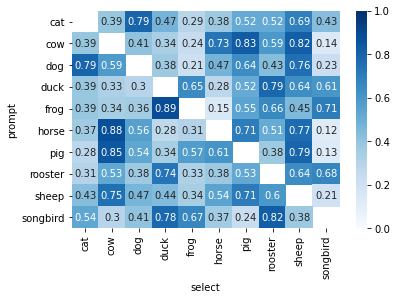

In [ ]:
animalProbsA = calcProbs(animalList, dfAudSm, 'animalProbs_A.csv')
makeHeatMap(animalProbsA, animalList, 'Blues')

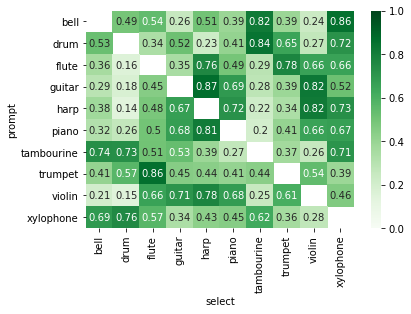

In [ ]:
instrProbsA = calcProbs(instrList, dfAudSm, 'instrProbs_A.csv')
makeHeatMap(instrProbsA, instrList, 'Greens')

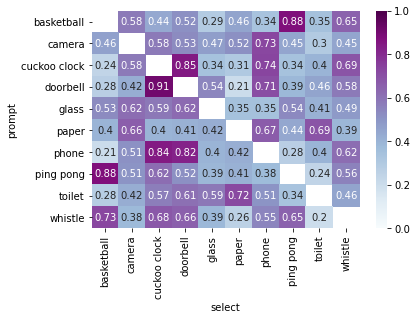

In [ ]:
hhProbsA = calcProbs(hhList, dfAudSm, 'hhProbs_A.csv')
makeHeatMap(hhProbsA, hhList, 'BuPu')

# Rerun analysis for visual only

In [ ]:
# make vis only mismatch mat
dfVis = mismatch[mismatch.trialType != 'a']

# Shrink vis mismatch matrix 
dfVisSm = dfVis.drop(columns = ["subjID", "trialNum", "keyPress", "RT", "experimentTime", "totalTime"])
dfVisSm.dropna(inplace=True)

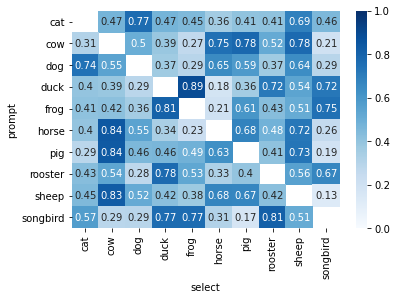

In [ ]:
animalProbsV = calcProbs(animalList, dfVisSm, 'animalProbs_V.csv')
makeHeatMap(animalProbsV, animalList, 'Blues')

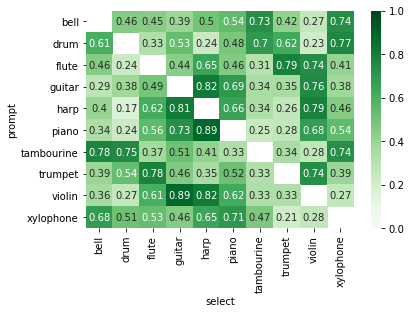

In [ ]:
instrProbsV = calcProbs(instrList, dfVisSm, 'instrProbs_V.csv')
makeHeatMap(instrProbsV, instrList, 'Greens')

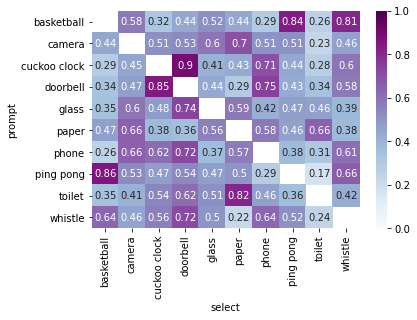

In [ ]:
hhProbsV = calcProbs(hhList, dfVisSm, 'hhProbs_V.csv')
makeHeatMap(hhProbsV, hhList, 'BuPu')